# How to acquire a single REIT ETF's historical data?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# !pip install pandas-datareader
# !pip install yfinance

import yfinance as yf
import pandas_datareader as pdr

In [2]:
# Access ticker data from Yahoo Finance
vnq = yf.Ticker('VNQ')

In [3]:
# Access ticker info
vnq_dict = vnq.info
vnq_dict

{'previousClose': 103.35,
 'regularMarketOpen': 103.35,
 'twoHundredDayAverage': 91.79985,
 'trailingAnnualDividendYield': 0.03418481,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 103.75,
 'navPrice': 103.93,
 'averageDailyVolume10Day': 4302633,
 'totalAssets': 74924646400,
 'regularMarketPreviousClose': 103.35,
 'fiftyDayAverage': 100.25823,
 'trailingAnnualDividendRate': 3.533,
 'open': 103.35,
 'averageVolume10days': 4302633,
 'expireDate': None,
 'yield': 0.021,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 103.08,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 3513089,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 4250120,
 'priceToSalesTrailing12Months': None,
 'dayLow': 103.08,
 'ask': 0,
 'ytdReturn': None,
 'askSize': 1200,
 'v

In [4]:
# Want to know the Inception Data of that stock
vnq_dict.get('fundInceptionDate')

# epoch & unix format

1095897600

[epoch & unix converter](https://www.epochconverter.com/)

In [5]:
# Epoch & Unix Timestamp Conversion
incep_date = pd.to_datetime(vnq_dict.get('fundInceptionDate'), unit='s')
incep_date

Timestamp('2004-09-23 00:00:00')

In [6]:
# Extract the year
incep_date.year

2004

In [7]:
# Show dividends and stock splits
vnq.actions

,Dividends,Stock Splits
Date,,
2004-12-22,1.270,0.0
2005-03-24,0.614,0.0
2005-06-27,0.644,0.0
2005-09-26,0.676,0.0
2005-12-27,1.627,0.0
...,...,...
2020-03-10,0.648,0.0
2020-06-25,0.759,0.0
2020-09-25,0.590,0.0


In [8]:
# Get historical market data
data = vnq.history(period='max')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-09-29,23.794544,23.861371,23.789772,23.794544,205800,0.0,0
2004-09-30,23.866143,24.023660,23.861370,23.985474,27900,0.0,0
2004-10-01,24.033207,24.462799,23.985476,24.429386,129800,0.0,0
2004-10-04,24.529629,24.606000,24.529629,24.534403,8100,0.0,0
2004-10-05,24.534403,24.582135,24.510535,24.529629,11900,0.0,0
...,...,...,...,...,...,...,...
2021-06-17,103.410004,103.699997,102.860001,103.550003,5055100,0.0,0
2021-06-18,103.019997,103.470001,101.790001,101.790001,5358000,0.0,0
2021-06-21,102.309998,104.209999,101.800003,103.889999,3672900,0.0,0


In [9]:
# Check the index
data.index

DatetimeIndex(['2004-09-29', '2004-09-30', '2004-10-01', '2004-10-04',
               '2004-10-05', '2004-10-06', '2004-10-07', '2004-10-08',
               '2004-10-11', '2004-10-12',
               ...
               '2021-06-10', '2021-06-11', '2021-06-14', '2021-06-15',
               '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-21',
               '2021-06-22', '2021-06-23'],
              dtype='datetime64[ns]', name='Date', length=4213, freq=None)

In [10]:
# Check the size of dataframe
data.shape

(4213, 7)

In [11]:
data.loc[data['Stock Splits'] !=0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


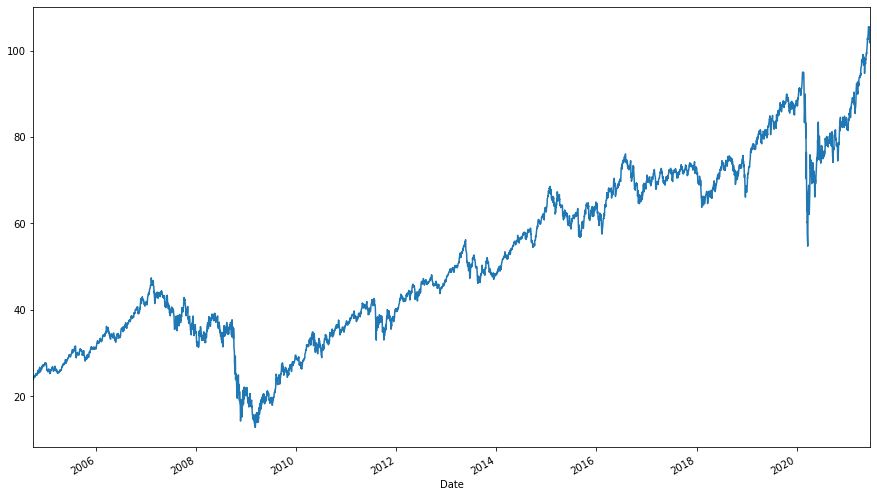

In [12]:
# Visualize the chart
data['Close'].plot(figsize=(15,9));

Get the start year of that REIT ETF (steps will be used in another notebook)

In [13]:
timestamp = yf.Ticker('VNQ').info.get('fundInceptionDate')
timestamp

1095897600

In [14]:
pd.to_datetime(timestamp, unit='s').year

2004

In [15]:
pd.to_datetime((vnq.info.get('fundInceptionDate')), unit='s').year

2004